In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
df_test = pd.read_csv("https://github.com/dsindy/kaggle-titanic/blob/master/data/test.csv?raw=true")

In [3]:
df_train = pd.read_csv("https://github.com/dsindy/kaggle-titanic/blob/master/data/train.csv?raw=true")

In [4]:
df_train = df_train.set_index('PassengerId')

In [5]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Sigmoid function

In [11]:
x = np.arange(-100, 100, 1)
y = 1/(1+np.exp(-x))

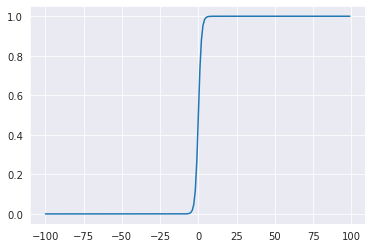

In [12]:
plt.plot(x, y)
plt.show()

## Metrics for classification problem

|                   | Predicted Covid+ | Predicted Covid- |
|-------------------|---------------|-------------------|
| **Actual Covid+**    | TP            | FN                |
| **Actual Covid-**| FP            | TN                |

| Total = 10       | Predicted Covid+ | Predicted Covid- |
|-------------------|---------------|-------------------|
| **Actual Covid+** | 5            | 1                |
| **Actual Covid-** | 1            | 3                |

$Accuracy = \frac{TP + TN}{\text{Total Instances}}$ = (Total cases correctly tested)

$Recall = \frac{TP}{TP + FN}$ = (How many of the actual positive cases have been tested correctly)

$Precision = \frac{TP}{TP + FP}$ = (Out of the reported positive cases, how many of them are actually Covid+)

<AxesSubplot:ylabel='PassengerId'>

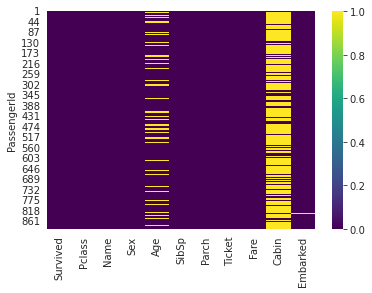

In [13]:
sns.heatmap(df_train.isnull(), cmap='viridis')

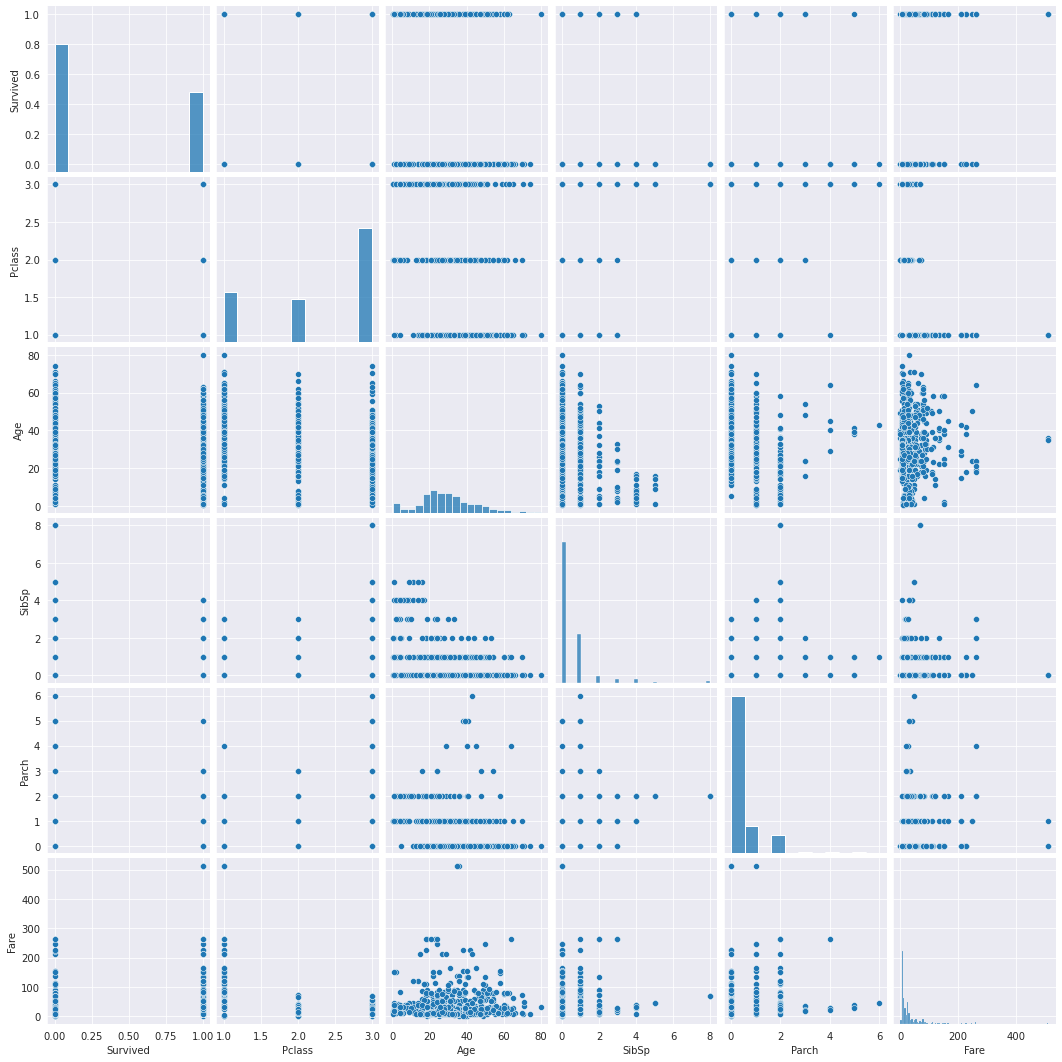

In [14]:
sns.pairplot(df_train)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

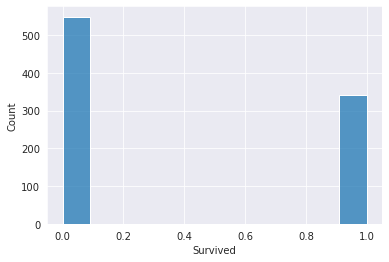

In [15]:
sns.histplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

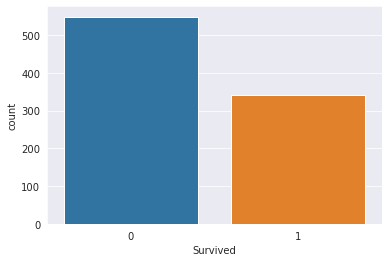

In [16]:
sns.countplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

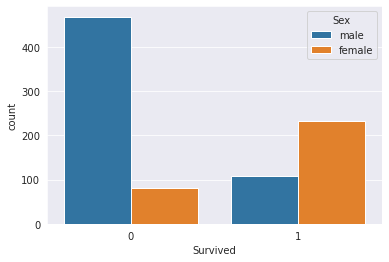

In [17]:
sns.countplot(data=df_train, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

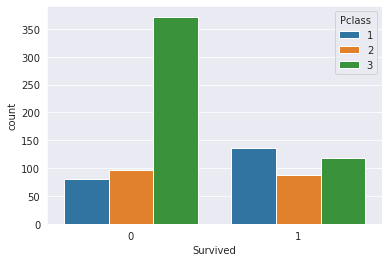

In [18]:
sns.countplot(data=df_train, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

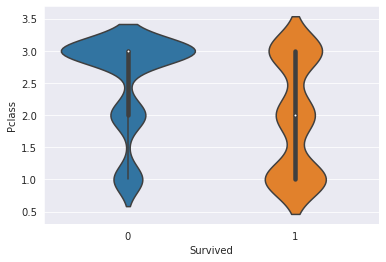

In [19]:
sns.violinplot(data=df_train, x='Survived', y='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

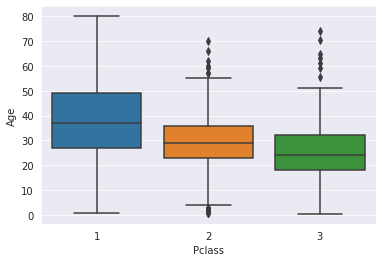

In [20]:
sns.boxplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

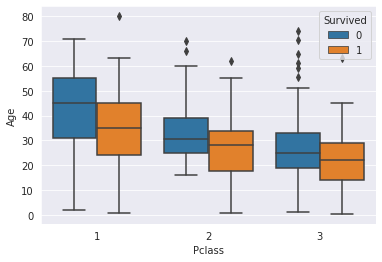

In [21]:
sns.boxplot(data=df_train, x='Pclass', y='Age', hue='Survived')

In [22]:
df_train.groupby(by='Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [23]:
df_train.groupby(by='Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='Survived'>

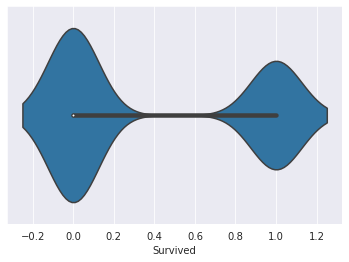

In [24]:
sns.violinplot(data=df_train, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived'>

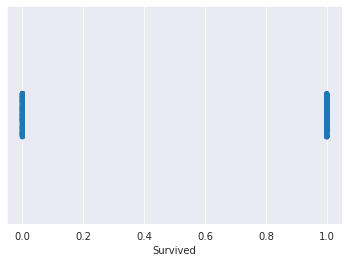

In [25]:
sns.stripplot(data=df_train, x='Survived', hue='Pclass')

In [26]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

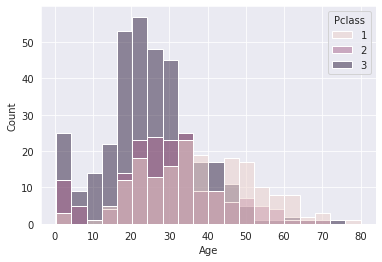

In [27]:
sns.histplot(data=df_train, x='Age', hue='Pclass')

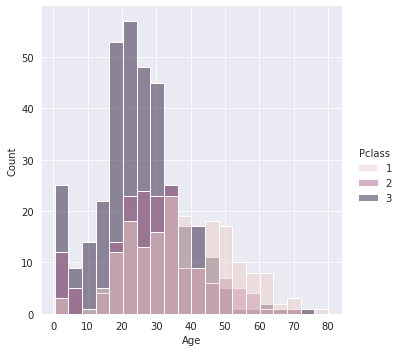

In [28]:
sns.displot(data=df_train, x='Age', hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

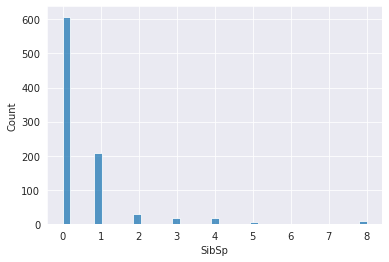

In [29]:
sns.histplot(data=df_train, x='SibSp')

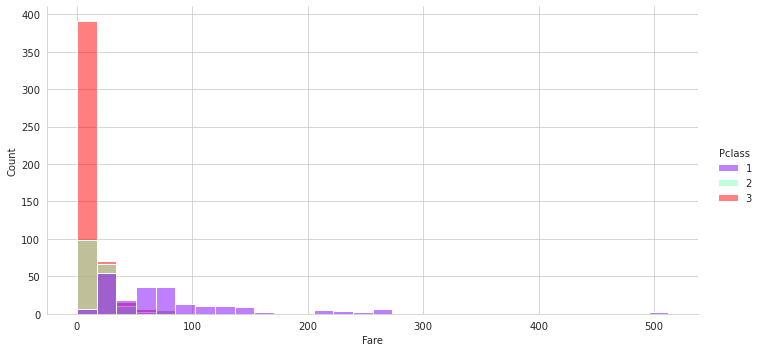

In [30]:
sns.set_style(style='whitegrid')
# plt.figure(figsize=(2, 3))
sns.displot(data=df_train, x='Fare', hue='Pclass', aspect=2, palette='rainbow', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

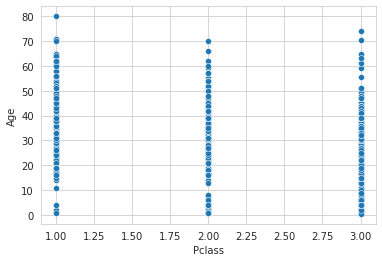

In [31]:
sns.scatterplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

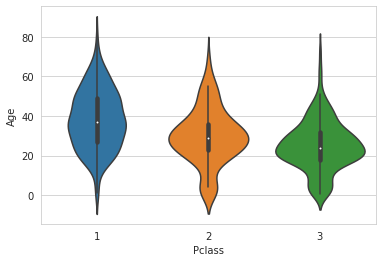

In [32]:
sns.violinplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

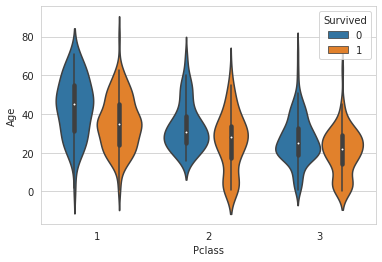

In [33]:
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

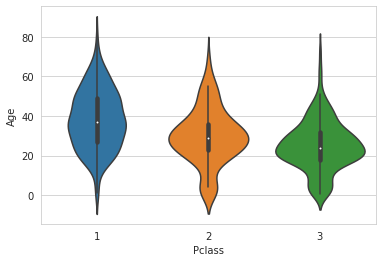

In [34]:
sns.violinplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

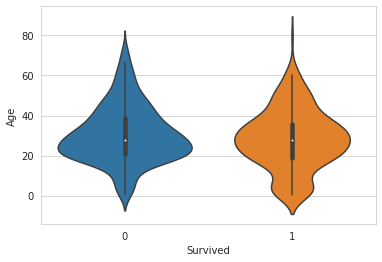

In [35]:
sns.violinplot(data=df_train, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

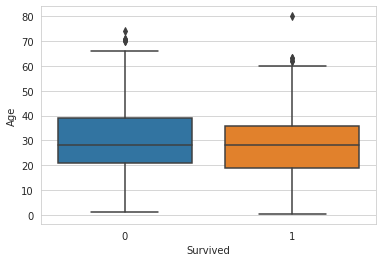

In [36]:
sns.boxplot(data=df_train, x='Survived', y='Age')

In [37]:
df_train['Age'].isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [38]:
df_train['Age'][df_train['Pclass']==2].mean()

29.87763005780347

In [39]:
df_train['Age'][df_train['Pclass']==1].mean()

38.233440860215055

In [40]:
df_train['Age'][df_train['Pclass']==3].mean()

25.14061971830986

In [49]:
pd.DataFrame(df_train.groupby('Pclass')['Age'].mean())

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [50]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [52]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

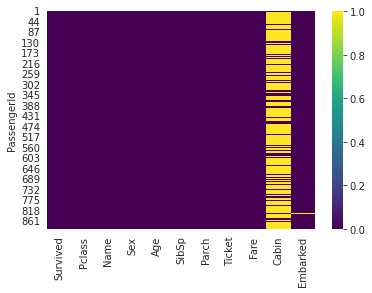

In [53]:
sns.heatmap(df_train.isna(), cmap='viridis')

In [54]:
df_train.drop('Cabin', inplace=True, axis=1)

In [55]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [56]:
df_train.dropna(inplace=True, axis=0)

In [57]:
df_train.isna().shape

(889, 10)

In [58]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

## Categorical to Dummy/Indicator variable

In [59]:
gender = pd.get_dummies(data=df_train['Sex'], drop_first=True)

In [60]:
gender

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


In [61]:
df_train = pd.concat([df_train, gender], axis=1)

In [62]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0


In [63]:
df_train_2 = df_train.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1)

In [64]:
df_train_2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
PassengerId,,,,,,,
1,0,3,22.0,1,0,7.2500,1
2,1,1,38.0,1,0,71.2833,0
3,1,3,26.0,0,0,7.9250,0
4,1,1,35.0,1,0,53.1000,0
5,0,3,35.0,0,0,8.0500,1


## Training Model

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df_train_2.drop('Survived', axis=1)
y = df_train_2['Survived']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_train_pred = lr.predict(X_train)

In [71]:
y_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.8540540540540541,
  'recall': 0.8586956521739131,
  'f1-score': 0.8563685636856369,
  'support': 184},
 '1': {'precision': 0.7614678899082569,
  'recall': 0.7545454545454545,
  'f1-score': 0.7579908675799086,
  'support': 110},
 'accuracy': 0.8197278911564626,
 'macro avg': {'precision': 0.8077609719811555,
  'recall': 0.8066205533596837,
  'f1-score': 0.8071797156327727,
  'support': 294},
 'weighted avg': {'precision': 0.8194129722307967,
  'recall': 0.8197278911564626,
  'f1-score': 0.81956058214948,
  'support': 294}}

In [77]:
pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.810742,0.764706,0.794958,0.787724,0.792946
recall,0.868493,0.678261,0.794958,0.773377,0.794958
f1-score,0.838624,0.718894,0.794958,0.778759,0.792342
support,365.000000,230.000000,0.794958,595.000000,595.000000


In [74]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.854054,0.761468,0.819728,0.807761,0.819413
recall,0.858696,0.754545,0.819728,0.806621,0.819728
f1-score,0.856369,0.757991,0.819728,0.807180,0.819561
support,184.000000,110.000000,0.819728,294.000000,294.000000


In [78]:
confusion_matrix(y_train, y_train_pred)

array([[317,  48],
       [ 74, 156]])

In [75]:
confusion_matrix(y_test, y_pred)

array([[158,  26],
       [ 27,  83]])